<a href="https://colab.research.google.com/github/PIRomanCod/DataSciense_HW/blob/main/HW_8_TensorFlow_mnist_ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Техзавдання - Создание нейронной сети



В этом задании мы создадим полносвязную нейронную сеть используя при этом низкоуровневые механизмы tensorflow.

Архитектутра нейросети представлена на следующем рисунке. Как видите, в ней имеется один входной слой, два скрытых, а так же выходной слой. В качестве активационной функции в скрытых слоях будет использоваться сигмоида. На выходном слое мы используем softmax.

Часть кода по созданию сети уже написана, от вас требуется заполнить пропуски в указанных местах.

### Архитектура нейронной сети

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>


### О датасете MNIST

Данную нейросеть мы будем обучать на датасете MNIST. Этот датасет представляет собой большое количество изображений рукописных цифр размером $28 \times 28$ пикселей. Каждый пиксель принимает значение от 0 до 255.

Как и раньше датасет будет разеделен на обучающую и тестовую выборки. При этом мы выполним нормализацию всех изображений, чтобы значения пикселей находились в промежутке от 0 до 1, разделив яркость каждого пикселя на 255.

Кроме того, архитектура нейронной сети ожидает на вход вектор. В нашем же случае каждый объект выборки представляет собой матрицу. Что же делать? В этом задании мы "растянем" матрицу $28 \times 28$, получив при этом вектор, состоящей из 784 элементов.

![MNIST Dataset](https://www.researchgate.net/profile/Steven-Young-5/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Больше информации о датасете можно найти [здесь](http://yann.lecun.com/exdb/mnist/).

## Імпорти та встановлення констант

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
num_classes = 10 # общее количество классов, в нашем случае это цифры от 0 до 9
num_features = 784 # количество атрибутов входного вектора 28 * 28 = 784

learning_rate = 0.001 # скорость обучения нейронной сети
training_steps = 3000 # максимальное число эпох
batch_size = 256 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов
display_step = 100 # каждые 100 итераций мы будем показывать текущее значение функции потерь и точности

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

## Завантаження даних, їх попередній аналіз та перетворення до належного стану

In [3]:
from tensorflow.keras.datasets import mnist

# Загружаем датасет
(x_train, y_train), (x_test, y_test) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_train.shape, y_test.shape

((60000,), (10000,))

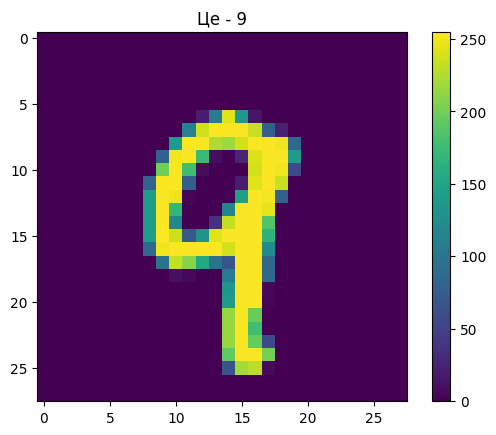

In [8]:
num = 2221
plt.figure()
plt.imshow(x_train[num])
plt.colorbar()
plt.grid(False)
plt.title(f'Це - {y_train[num]}')
plt.show()

In [9]:
# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

Відобразимо перші 25 єкземпярів з датасету

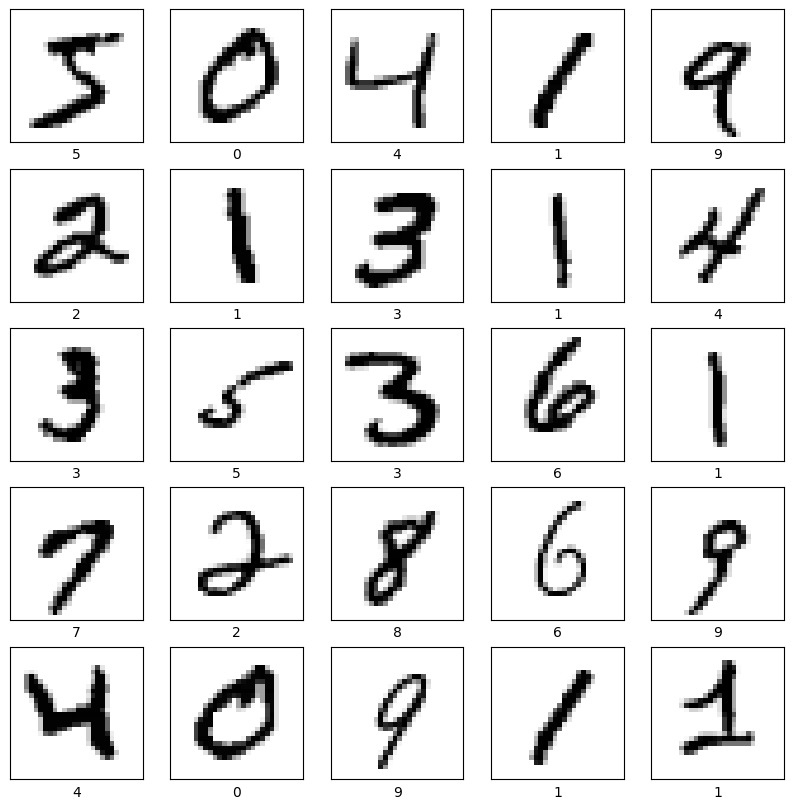

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [11]:
# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

## Створення нейромережі, функції втрат, та її навчання

In [12]:
# Создадим нейронную сеть

class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.weights = tf.Variable(tf.random.normal([in_features, out_features]))
        self.biases = tf.Variable(tf.zeros([out_features]))

    def __call__(self, x):
        return tf.matmul(x, self.weights) + self.biases


class NN(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)
    # Первый слой, состоящий из 128 нейронов
    self.layer1 = DenseLayer(num_features, n_hidden_1)

    # Второй слой, состоящий из 256 нейронов
    self.layer2 = DenseLayer(n_hidden_1, n_hidden_2)

    # Выходной слой
    self.out_layer = DenseLayer(n_hidden_2, num_classes)

  def __call__(self, x):
    x = self.layer1(x)
    x = tf.nn.relu(x)
    x = self.layer2(x)
    x = tf.nn.sigmoid(x)

    # Помните что для выхода нейронной сети мы применяем к выходу функцию softmax.
    # Делаем мы это для того, чтобы
    # выход нейронной сети принимал значения от 0 до 1 в соответствии с вероятностью
    # принадлежности входного объекта к одному из 10 классов

    x = self.out_layer(x)
    return tf.nn.softmax(x)

In [13]:
# В качестве функции ошибки в данном случае удобно взять кросс-энтропию
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)

    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Вычисление кросс-энтропии
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# В качестве метрики качества используем точность
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

In [14]:
# Создадим экзампляр нейронной сети
neural_net = NN(name="mnist")

# Функция обучения нейросети
def train(nn, input_x, output_y):
  # Для подгонки весов сети будем использовать стохастический градиентный спуск
  optimizer = tf.optimizers.SGD(learning_rate)

  # Активация автоматического дифференцирования
  with tf.GradientTape() as g:
    pred = nn(input_x)
    loss = cross_entropy(pred, output_y)

    # Создадим оптимизируемых список параметров
    trainable_variables = nn.trainable_variables

    # Вычислим по ним значение градиента
    gradients = g.gradient(loss, trainable_variables)

    # Модифицируем параметры
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [ ]:
# Тренировка сети

loss_history = []  # каждые display_step шагов сохраняйте в этом список текущую ошибку нейросети
accuracy_history = [] # каждые display_step шагов сохраняйте в этом список текущую точность нейросети

# В этом цикле мы будем производить обучение нейронной сети
# из тренировочного датасета train_data извлеките случайное подмножество, на котором
# произведется тренировка. Используйте метод take, доступный для тренировочного датасета.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Обновляем веса нейронной сети
    train(neural_net, batch_x, batch_y)

    if step % display_step == 0:
        pred = neural_net(batch_x)

        acc = accuracy(pred, batch_y)
        loss = cross_entropy(pred, batch_y)
        accuracy_history.append(acc)
        loss_history.append(loss)

        print(f"Крок: {step}, Втрати: {loss:.4f}, Точність: {acc:.4f}")

Шаг: 100, Потери: 225.8584, Точность: 0.7734
Шаг: 200, Потери: 168.9062, Точность: 0.8164
Шаг: 300, Потери: 173.3657, Точность: 0.7852
Шаг: 400, Потери: 177.1717, Точность: 0.8555
Шаг: 500, Потери: 131.0486, Точность: 0.8750
Шаг: 600, Потери: 158.8673, Точность: 0.8477
Шаг: 700, Потери: 114.0739, Точность: 0.8672
Шаг: 800, Потери: 114.1835, Точность: 0.8711
Шаг: 900, Потери: 130.4962, Точность: 0.8711
Шаг: 1000, Потери: 110.8566, Точность: 0.8867
Шаг: 1100, Потери: 89.8804, Точность: 0.9180
Шаг: 1200, Потери: 90.8872, Точность: 0.9180
Шаг: 1300, Потери: 107.1264, Точность: 0.8906
Шаг: 1400, Потери: 50.9554, Точность: 0.9336
Шаг: 1500, Потери: 79.8906, Точность: 0.9219
Шаг: 1600, Потери: 121.2337, Точность: 0.8906
Шаг: 1700, Потери: 96.2655, Точность: 0.9141
Шаг: 1800, Потери: 68.0551, Точность: 0.9258
Шаг: 1900, Потери: 55.9146, Точность: 0.9414
Шаг: 2000, Потери: 40.3181, Точность: 0.9570


## Візуалізація результатів навчання

In [ ]:
# Выведите графики зависимости изменения точности и потерь от шага
# Если все сделано правильно, то точность должна расти, а потери уменьшаться

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Втрати у процесі навчання')
plt.plot(loss_history, label='Втрати')
plt.xlabel('Кроки')
plt.ylabel('Значення')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Точність у процесі навчання')
plt.plot(accuracy_history, label='Точність')
plt.xlabel('Кроки')
plt.ylabel('Значення')
plt.legend()

plt.show()

In [ ]:
# Вычислите точность обученной нейросети

test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(batch_size).prefetch(1)

accuracy_test = []
loss_test = []
test_pred = []
for batch_x, batch_y in test_data:
    pred = neural_net(batch_x)
    test_pred.append(pred)
    acc = accuracy(pred, batch_y)
    loss = cross_entropy(pred, batch_y)
    accuracy_test.append(acc)
    loss_test.append(loss)

print(f"Точність на тестовій вибірці: {np.mean(accuracy_test):.4f}")

Виведемо втрати та точність як на ттренувальній так і на тестових вибірках одночасно

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Втрати train')
plt.plot(loss_test, label='Втрати test')
plt.xlabel('Кроки')
plt.ylabel('Значення')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Точність train')
plt.plot(accuracy_test, label='Точність test')
plt.xlabel('Кроки')
plt.ylabel('Значення')
plt.legend()
plt.show()

## Побудуємо confusion_matrix

In [ ]:
test_pred = np.concatenate(test_pred, axis=0)
predict_values = np.argmax(test_pred, axis=1)

cm = confusion_matrix(y_test, predict_values, labels=np.arange(num_classes))
df_confusion_matrix = pd.DataFrame(cm, index=np.arange(num_classes), columns=np.arange(num_classes))

plt.figure(figsize=(8, 8))
plt.title('Матриця помилок')
sns.heatmap(df_confusion_matrix, fmt="d", annot=True, cbar=False, cmap="Oranges", linewidths=1, linecolor="black")
plt.xlabel("Predicted labels", fontsize=15)
plt.xticks(fontsize=10)
plt.ylabel("True labels", fontsize=15)
plt.yticks(fontsize=10, rotation=0)
plt.show()

## Error Analyse

In [ ]:
# Знайдемо всі помилки
misclassified_indices = np.where(predict_values != y_test)[0]

# Відобразимо на графіку частину з них з правильними та передбаченими мітками
plt.figure(figsize=(12, 8))
for i, index in enumerate(misclassified_indices[:20]):  # наприклад перші 20
    image = x_test[index].reshape((28, 28))
    true_label = y_test[index]
    predicted_label = predict_values[index]

    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.show()

In [ ]:
# Загальна кількість невлучних передбачень
misclassified_indices.shape

## Висновок:

Створена нейромережа в залежністі від запусків видає точність від 88 до 93%, що на мою думку є гарним результатом (було досягнуто підбором активаційної функції relu/sigmoid). Додатково до основного завдання реалізована робота над помилками: побудована матриця помилок з їх підрахунком, та візуалізовано частину з типових помилок. Знайдений недолік - втрачання пям'яті, який потрібно вирішити за допомогою декоратора @tf.function, але цей рефакторінг залишимо на опісля. Загальна проблема - наданої колабом потужності не вистачає на розрахунок цієї роботи, але вирішено за рахунок докера з контейнером tensoflow з документації бібліотеки